In [1]:
import pandas as pd
import numpy as np
import datetime

In [2]:
df=pd.read_excel('ANZ synthesised transaction dataset.xlsx')

In [3]:
df['month'] = pd.DatetimeIndex(df['date']).month
dfsalary= df.groupby(['customer_id','month','movement','account','first_name','gender','age','balance','time'])['amount'].sum().reset_index(name='Sum(Amount)')

In [4]:
credit =  dfsalary['movement']=='credit'
creditdf = dfsalary[credit]

In [5]:
creditdf=creditdf.groupby('customer_id').agg({'Sum(Amount)' : lambda x:x.mode()}).reset_index()

In [6]:
creditdf['Annual Salary']=creditdf['Sum(Amount)']*12

In [7]:
df2=dfsalary.merge(creditdf, left_on='customer_id', right_on='customer_id').reindex()

In [8]:
debit= df['movement']=='debit'
dfdebit = df[debit]
dfdebit=dfdebit.groupby('customer_id')['month'].value_counts().reset_index(name='count')
df3=df2.merge(dfdebit, left_on='customer_id', right_on='customer_id').reindex()
df3['hour'] = df3.time.apply(lambda x: x.hour)

# Age vs Annual Salary

In [9]:
import matplotlib.pyplot as plt
plt.scatter(df2['age'],df2['Annual Salary'])
plt.show()

<Figure size 640x480 with 1 Axes>

# Balance vs Annual Salary

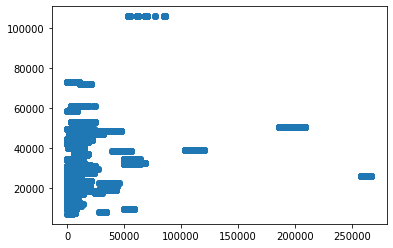

In [10]:
plt.scatter(df3['balance'],df3['Annual Salary'])
plt.show()

# Count of debits every month vs Annual Salary

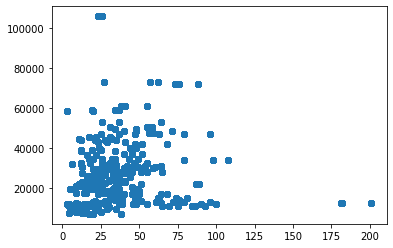

In [11]:
plt.scatter(df3['count'],df3['Annual Salary'])
plt.show()

# Regression model for Annual Salary

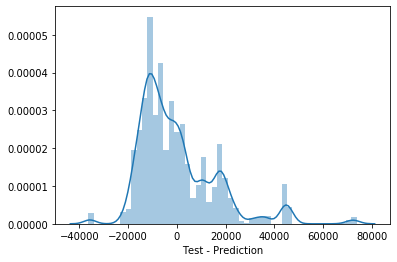

Value is: [[27663.64265303]]


In [12]:
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
X = df3[['age', 'count','balance']]
Y = df3[['Annual Salary']]
X_train, X_test, y_train, y_test = train_test_split(X, Y)
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
sb.distplot(y_test - predictions, axlabel="Test - Prediction")
plt.show()
myvals = np.array([30, 20, 3000]).reshape(1, -1)
y_pred=model.predict(myvals)
print('Value is:',y_pred) 
#accuracy_score(y_test['Annual Salary'],predictions[0], normalize=False)